In [1]:
import pyiron_base
pyiron_base.__file__

/Users/jan/mambaforge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/jan/projects/pyiron_base/pyiron_base/__init__.py'

In [2]:
from pyiron_base import Project
from pyiron_base.project.delayed import draw

In [3]:
pr = Project("test")

In [4]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]


In [5]:
def add_x_and_y(x, y):
    z = x + y
    return z

In [6]:
def add_x_and_y_and_z(x, y, z):
    w = x + y + z
    return w

In [7]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]


In [8]:
z = pr.wrap_python_function(python_function=add_x_and_y, x=1, y=2, delayed=True)

In [9]:
w = pr.wrap_python_function(python_function=add_x_and_y_and_z, x=1, y=2, z=z, delayed=True)
w.result()

The job add_x_and_y98e3f06a7711da5c66cb8502e98d7815 was saved and received the ID: 67
The job add_x_and_y_and_ze74f09c324b7665409df08d33597ba73 was saved and received the ID: 68


6

In [10]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,67,finished,None,add_x_and_y98e3f06a7711da5c66cb8502e98d7815,/add_x_and_y98e3f06a7711da5c66cb8502e98d7815,None,/Users/jan/notebooks/2024/2024-06-28-compare-workflows/test/,2024-07-02 20:07:23.712153,2024-07-02 20:07:23.829903,0.0,pyiron@MacBook-Pro.local#1,PythonFunctionContainerJob,0.4,None,None
1,68,finished,None,add_x_and_y_and_ze74f09c324b7665409df08d33597ba73,/add_x_and_y_and_ze74f09c324b7665409df08d33597ba73,None,/Users/jan/notebooks/2024/2024-06-28-compare-workflows/test/,2024-07-02 20:07:23.967067,2024-07-02 20:07:24.087735,0.0,pyiron@MacBook-Pro.local#1,PythonFunctionContainerJob,0.4,None,None


In [11]:
w = pr.wrap_python_function(python_function=add_x_and_y_and_z, x=1, y=2, z=z, delayed=True)
w.result()

2024-07-02 20:07:24,345 - pyiron_log - WARNING - The job add_x_and_y_and_ze74f09c324b7665409df08d33597ba73 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


6

In [12]:
nodes_dict, edges_lst = w.get_graph()
nodes_dict, edges_lst

({'create_function_job_7581cb7b24b36694b34fb692a0b1a1f1': <pyiron_base.project.delayed.DelayedObject at 0x12b2a3410>,
  'x_1d847da32ecaabf6731c38f798c3d4ce': 1,
  'y_a9ec4f5f33f0d64e74ed5d9900bceac6': 2,
  'create_function_job_181684719c069e73e9565da4fc458815': <pyiron_base.project.delayed.DelayedObject at 0x12b2b3e90>},
 [['create_function_job_7581cb7b24b36694b34fb692a0b1a1f1',
   'x_1d847da32ecaabf6731c38f798c3d4ce'],
  ['create_function_job_7581cb7b24b36694b34fb692a0b1a1f1',
   'y_a9ec4f5f33f0d64e74ed5d9900bceac6'],
  ['create_function_job_7581cb7b24b36694b34fb692a0b1a1f1',
   'create_function_job_181684719c069e73e9565da4fc458815'],
  ['create_function_job_181684719c069e73e9565da4fc458815',
   'x_1d847da32ecaabf6731c38f798c3d4ce'],
  ['create_function_job_181684719c069e73e9565da4fc458815',
   'y_a9ec4f5f33f0d64e74ed5d9900bceac6']])

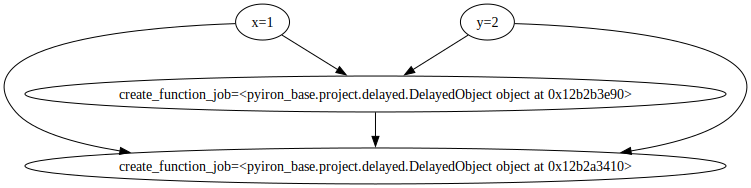

In [13]:
draw(node_dict=nodes_dict, edge_lst=edges_lst)